I need to check my results from evilmc against batman to make sure I'm calculating transits correctly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PyAstronomy.modelSuite import forTrans as ft
from evilmc import evparams, evmodel

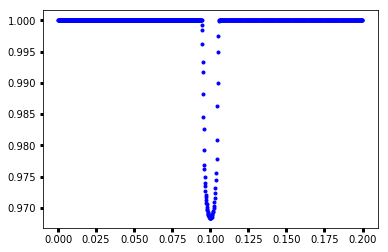

In [29]:
# Create MandelAgolLC object with
# keplerian orbit and quadratic limb darkening
ma = ft.MandelAgolLC(orbit="keplerian", ld="quad")

# Set parameters
ma["per"] = 0.2
ma["i"] = 88.76
ma["a"] = 6.5
ma["p"] = 0.16
ma["linLimb"] = 0.47
ma["quadLimb"] = 0.24
ma["b"] = 0.
ma["e"] = 0.
ma["w"] = 90.
ma["Omega"] = 3.9

# Choose some time axis
time = np.linspace(0, 0.5, 1000)

# ... and calculate model
y = ma.evaluate(time)

# Let's see what happened ...
plt.plot(time % ma["per"], y, 'b.')
plt.show()

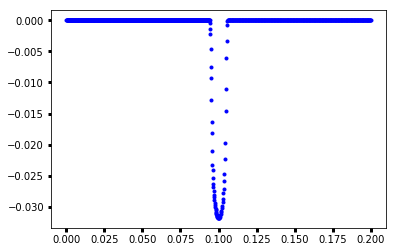

In [26]:
del_t = time[1] - time[0]
ep = evparams(per=ma["per"], a=ma["a"], T0=0.1, p=ma["p"], 
              limb_dark="quadratic", b=ma["b"], 
              F0=0, Aplanet=0, phase_shift=0., beta=0, q=0, Kz=0, Ts=6000., Ws=[0.,0.,0.], 
              u=[ma["linLimb"], ma["quadLimb"]])
em = evmodel(time, ep, supersample_factor=5, exp_time=del_t)

plt.plot(time % ep.per, em.all_signals(), 'b.')